<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/Juros_Analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install investpy
import investpy as inv

     |████████████████████████████████| 4.4MB 2.7MB/s 
     |████████████████████████████████| 245kB 45.6MB/s 
     |████████████████████████████████| 5.5MB 42.7MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=ba181e96b7d6d4a112ecb8c9895eb8789964fa39b24d49c0b82f377f725d8cb8
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [0]:
import pandas as pd
import matplotlib ; matplotlib.rcParams['figure.figsize'] = (22,8)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.graph_objects as go

In [5]:
bondsBR = inv.get_bonds_list('Brazil')
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [8]:
bonds_overview = inv.get_bonds_overview('Brazil')
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,2.690,2.714,2.690,2.690,-0.024,-0.88%
1,brazil,Brazil 6M,2.320,2.325,2.380,2.325,-0.005,-0.22%
2,brazil,Brazil 9M,2.493,2.495,2.493,2.493,0.000,0.00%
3,brazil,Brazil 1Y,2.615,2.630,2.680,2.630,-0.015,-0.57%
4,brazil,Brazil 2Y,3.510,3.570,3.510,3.510,-0.060,-1.68%
5,brazil,Brazil 3Y,4.852,4.895,4.852,4.852,-0.043,-0.88%
6,brazil,Brazil 5Y,5.803,5.785,5.825,5.825,+0.018,+0.31%
7,brazil,Brazil 8Y,6.562,6.585,6.660,6.585,-0.023,-0.35%
8,brazil,Brazil 10Y,6.930,6.960,7.090,6.960,-0.030,-0.43%


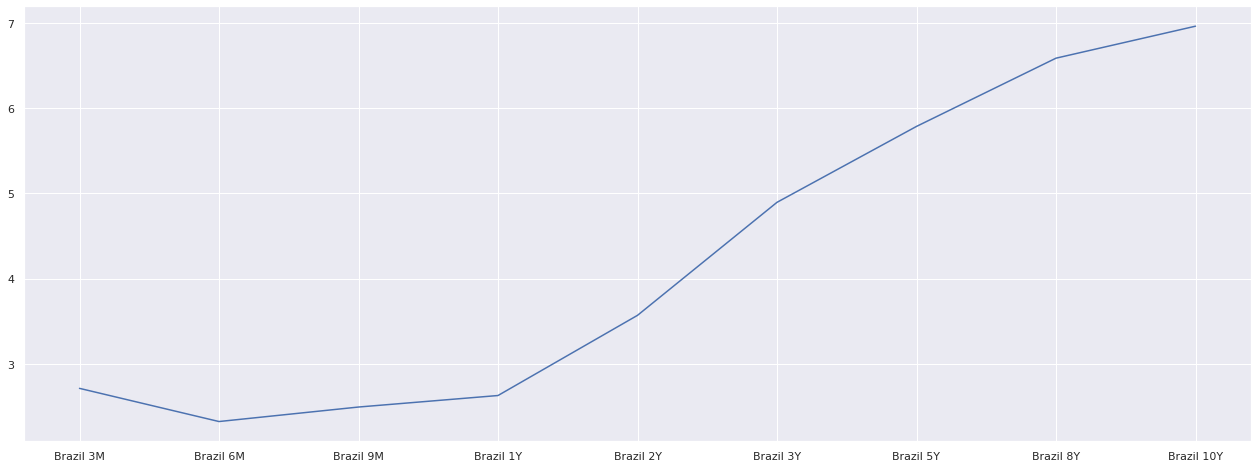

In [9]:
plt.plot(bondsBR, bonds_overview['last_close']);

In [17]:
#Values for Brazil bonds at 1Y in the period given bellow.
start_date = '01/01/2010'
end_date = '29/05/2020'
one_year = inv.get_bond_historical_data('Brazil 1Y', from_date=start_date, to_date=end_date)
one_year

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2020-05-25,2.865,2.865,2.700,2.700
2020-05-26,2.700,2.725,2.665,2.705
2020-05-27,2.730,2.730,2.715,2.715


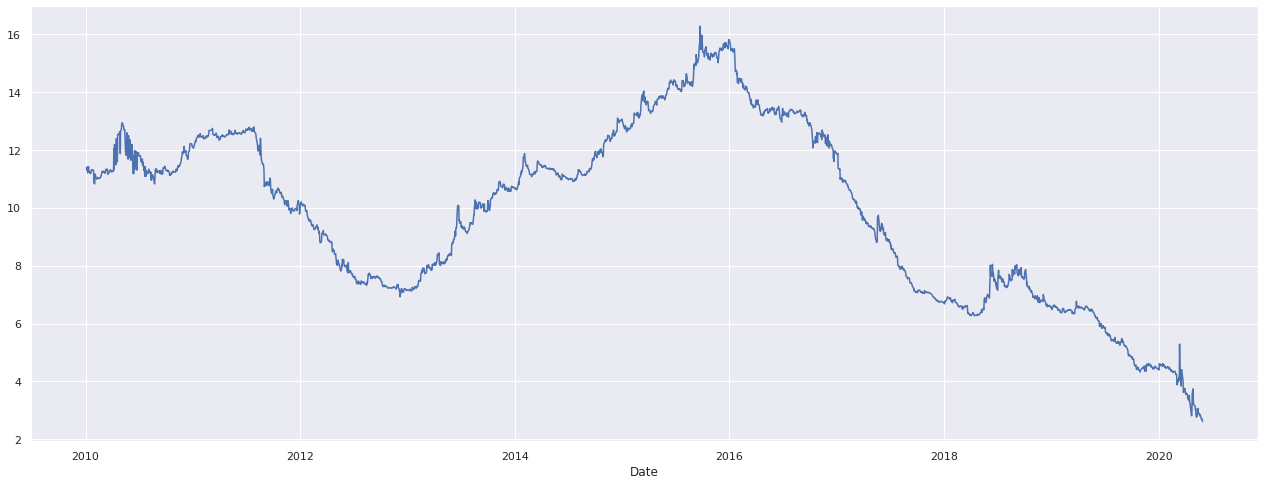

In [19]:
one_year['Close'].plot();

In [20]:
#Values for Brazil bonds at 10Y in the period given bellow.
start_date = '01/01/2010'
end_date = '29/05/2020'
ten_year = inv.get_bond_historical_data('Brazil 10Y', from_date=start_date, to_date=end_date)
ten_year

,Open,High,Low,Close
Date,,,,
2010-06-04,12.788,12.788,12.788,12.788
2010-06-07,12.788,12.788,12.410,12.410
2010-06-08,12.788,12.788,12.430,12.430
2010-06-09,12.788,12.788,12.430,12.510
2010-06-10,12.510,12.788,12.440,12.570
...,...,...,...,...
2020-05-25,7.430,7.430,7.095,7.095
2020-05-26,7.095,7.095,6.975,7.040
2020-05-27,7.060,7.135,7.040,7.040


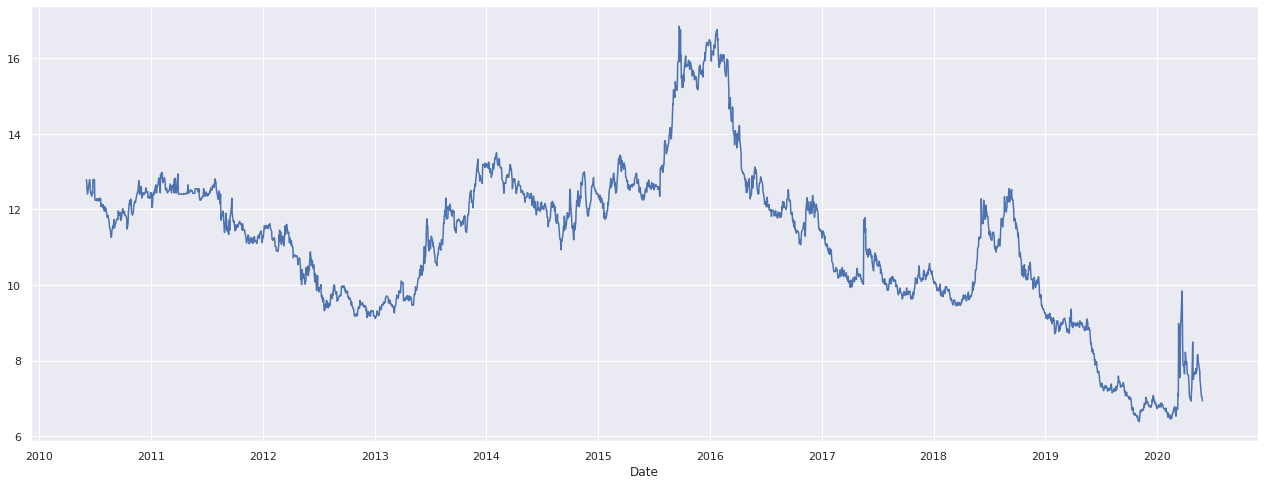

In [21]:
ten_year['Close'].plot();

In [27]:
#Values for Brazil bonds at all taxes in the period given bellow.
start_date = '01/01/2010'
end_date = '29/05/2020'
bonds = pd.DataFrame()
for prazo in bondsBR: #pazo is the anchor
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=start_date, to_date=end_date)['Close']
bonds.index = pd.to_datetime(bonds.index)
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-25,2.754,2.435,2.509,2.700,3.574,4.942,5.875,6.680,7.095
2020-05-26,2.728,2.410,2.515,2.705,3.575,4.895,5.820,6.610,7.040
2020-05-27,2.730,2.410,2.525,2.715,3.600,4.910,5.765,6.595,7.040


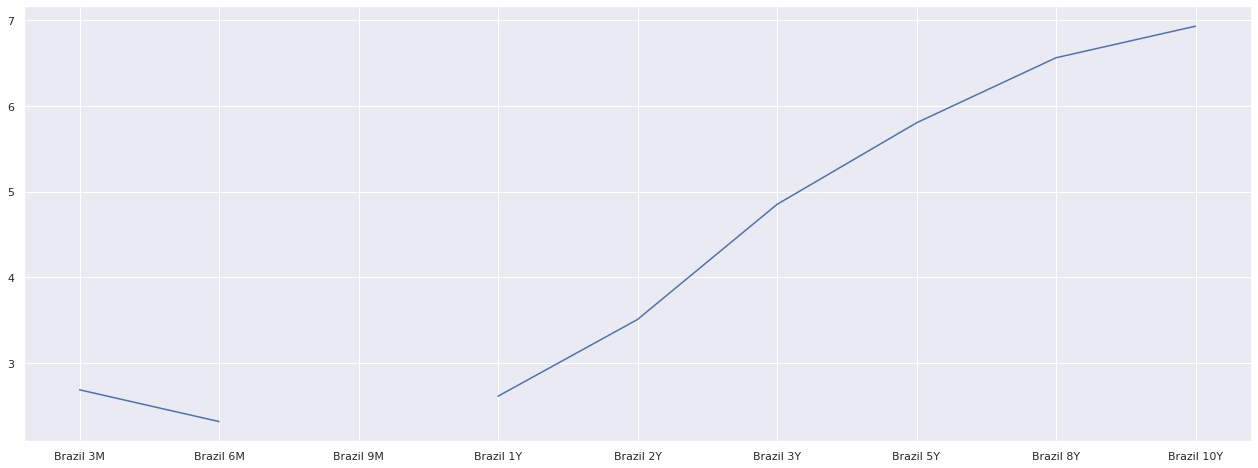

In [29]:
plt.plot(bondsBR, bonds.loc['2020-05-29'])

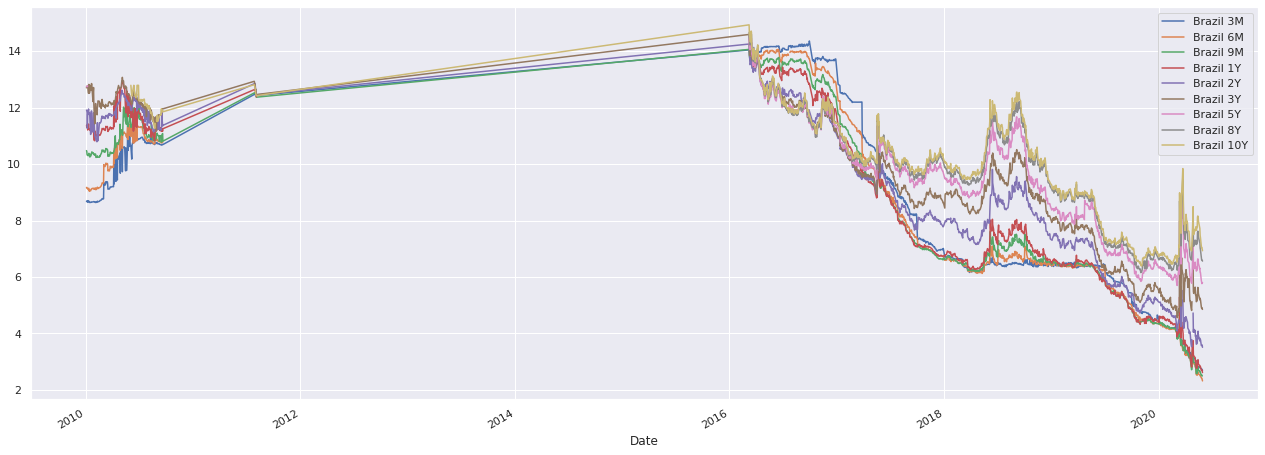

In [61]:
bonds.plot();

In [32]:
fig = go.Figure()

for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i], mode='lines', name=str(i)));
fig.show()

In [49]:
#Values for Brazil bonds at all taxes in the period given bellow / Montly.
start_date = '01/01/2010'
end_date = '29/05/2020'
bondsMonth = pd.DataFrame()
for prazo in bondsBR:
  bondsMonth[prazo] = inv.get_bond_historical_data(prazo, from_date=start_date, to_date=end_date, interval='Monthly')['Close']

fig = go.Figure()

for i in bondsMonth.index:
  fig.add_trace(
      go.Scatter(
          x=bondsBR, 
          y=bondsMonth.loc[i], 
          mode='lines',
          name=str(i),
          visible=False
        )
    )

fig.data[0].visible = True

steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )

  step['args'][1][i] = True

  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês: "},
    pad={'t':50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[3,14.5])
)

fig.show()

In [0]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [0]:
selic_meta = consulta_bc(432)

In [0]:
s2010 = selic_meta[selic_meta.index.year >= 2010]
b2010 = bonds[bonds.index.year >=2010]

In [57]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2010.index, y=b2010[i], mode='lines', name=str(i)));

fig.add_trace(go.Scatter(x=s2010.index, y=s2010['valor'], mode='lines', line={'color':'black'}, name='Selic'));

fig.show()